# PolyMagnet

The `Polymagnet` class is a convenient wrapper to generate arbitratry, complex shapes in 2D. A Polymagnet consists of a list of vertices, and the lines connecting them. 
By knowning what the magnetic field is due to a single line (or more precisely, an infinitely-long current sheet), we can calculate the magnetic field due any complex polygon that is a sum of lines.

A first example is to compare the field from a 2D rectangle to a 4-sided PolyMagnet.

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    %pip install pymagnet -q
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [2]:
# Matplotlib settings
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


There are two main ways to define a PolyMagnet, first as a regular N-sided polygon

using:

`PolyMagnet(length=2.0, num_sides=4, Jr = 1)`

For a regular polygon, there are three ways to set it size, using side length `length`, incircle radius `apothem`, or circumcircle radius `radius`. Order of precendence is apothem, length, radius.

A custom polygon can be defined using `PolyMagnet(custom_polygon=True,vertices=vertices, Jr=1.0)`

## Regular Polygons

### Square Magnet

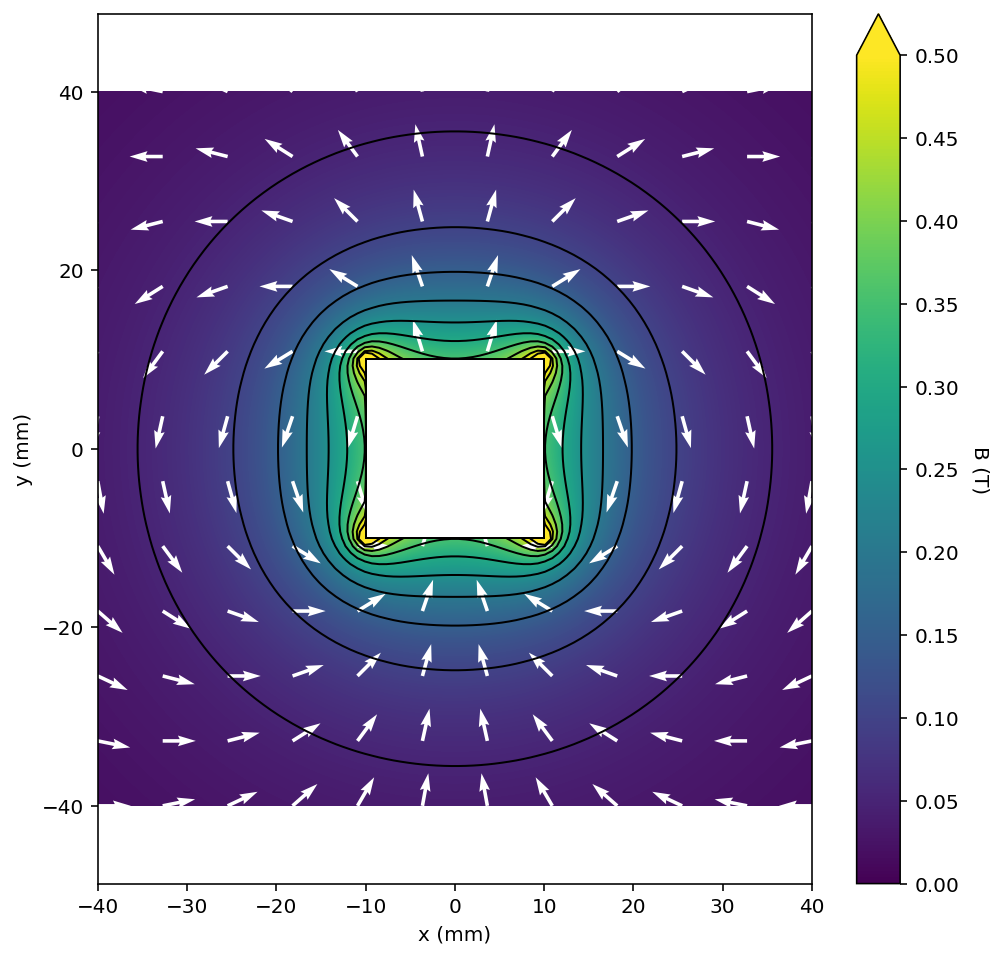

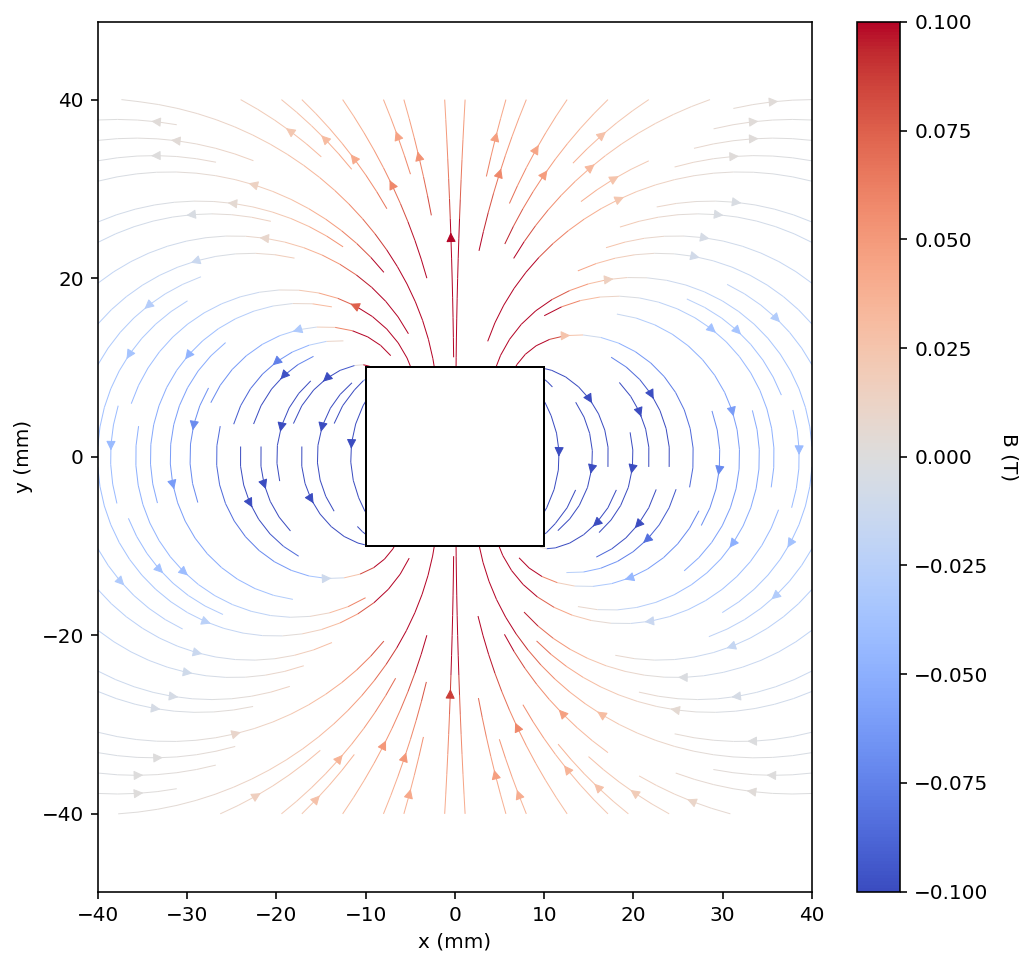

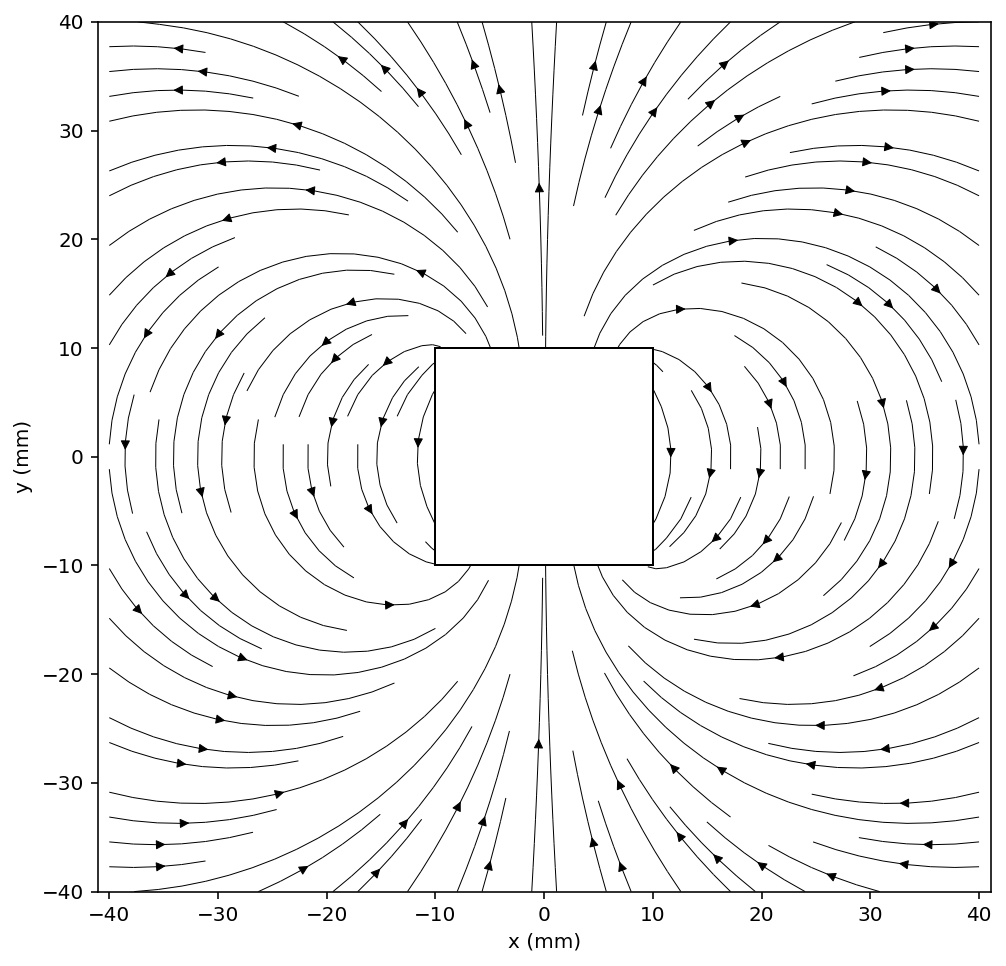

In [3]:
pm.reset() # clear magnet registry

unit = 'mm'
length = 20
num_sides = 4
center=(0, 0)

# Create the magnet
_ = pm.magnets.PolyMagnet(length=length, num_sides=4, center=center, Jr=1.0, phi = 90)



# Prepare 100x100 grid of x,y coordinates to calculate the field
points = pm.grid2D(2 * length, 2 * length, unit=unit)

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_,_ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 show_magnets=True,
                                 )


_,_ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_,_ = pm.plots.plot_2D_contour(points, field,plot_type='streamplot')

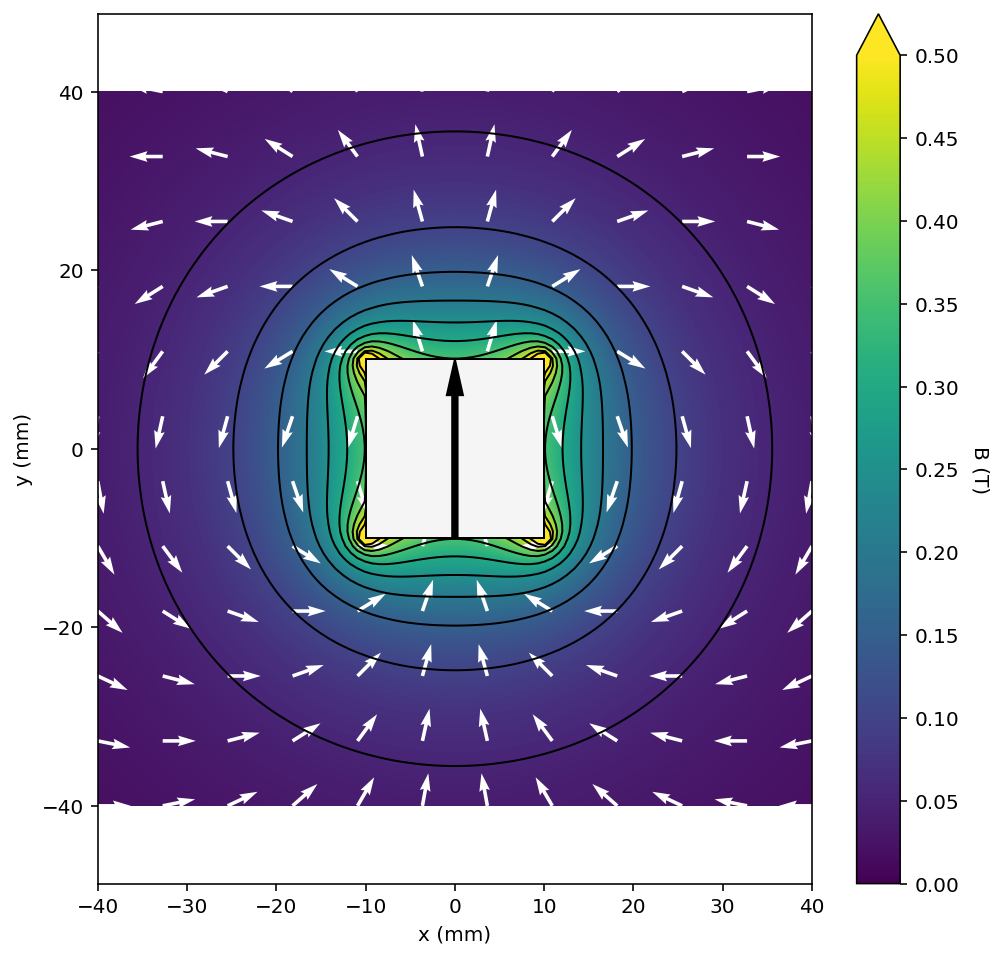

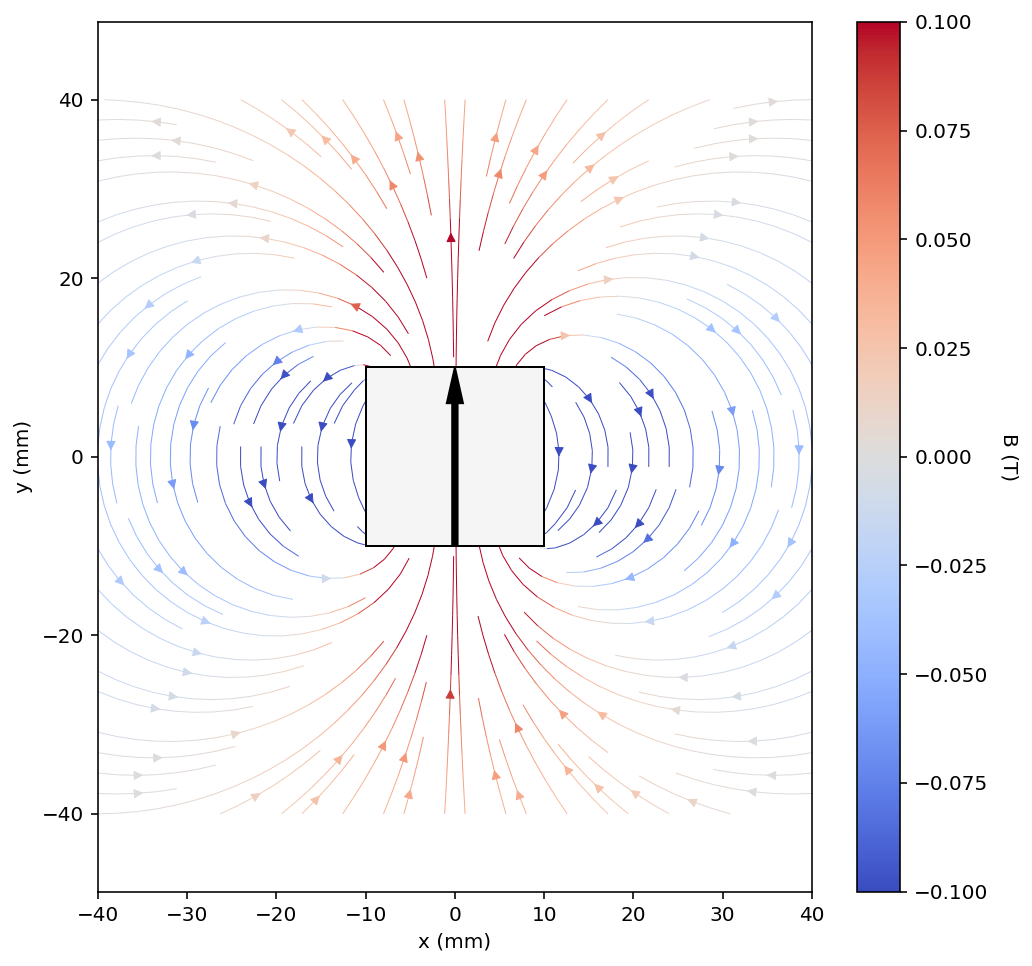

In [4]:
pm.reset() # clear magnet registry

unit = 'mm'
length = 20
num_sides = 4
center=(0, 0)

# Create the magnet
_ = pm.magnets.Square(width=length, center=center, Jr=1.0, phi = 90)

# Prepare 100x100 grid of x,y coordinates to calculate the field
points = pm.grid2D(2 * length, 2 * length, unit=unit)

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_,_ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 show_magnets=True,
                                 )


_,_ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )




There are some numerical errors, but the relative difference between the field magnitudes of the two methods is small:

In [6]:

points = pm.grid2D(2 * length, 3 * length, num_points=200, ymin=length*1.1, unit=unit)

pm.reset() # clear magnet registry
_ = pm.magnets.PolyMagnet(length=length, num_sides=4, center=center, Jr=1.0, phi = 90)
field_poly = pm.get_field_2D(points)

pm.reset() # clear magnet registry
_ = pm.magnets.Square(width=length, center=center, Jr=1.0, phi = 90)
field_square = pm.get_field_2D(points)

relative_difference = np.mean(np.fabs(field_square.n - field_poly.n)/field_square.n)
print(f"Relative difference in |B| is: {relative_difference:1.1e}")

Relative difference in |B| is: 1.9e-05


### Higher Order Polygons

N-sided polygons can be generated uing the `num_sides` keyword, but also notice in the plot below that the magnetisation is at 60˚ to the x-axis (`phi = 60`):

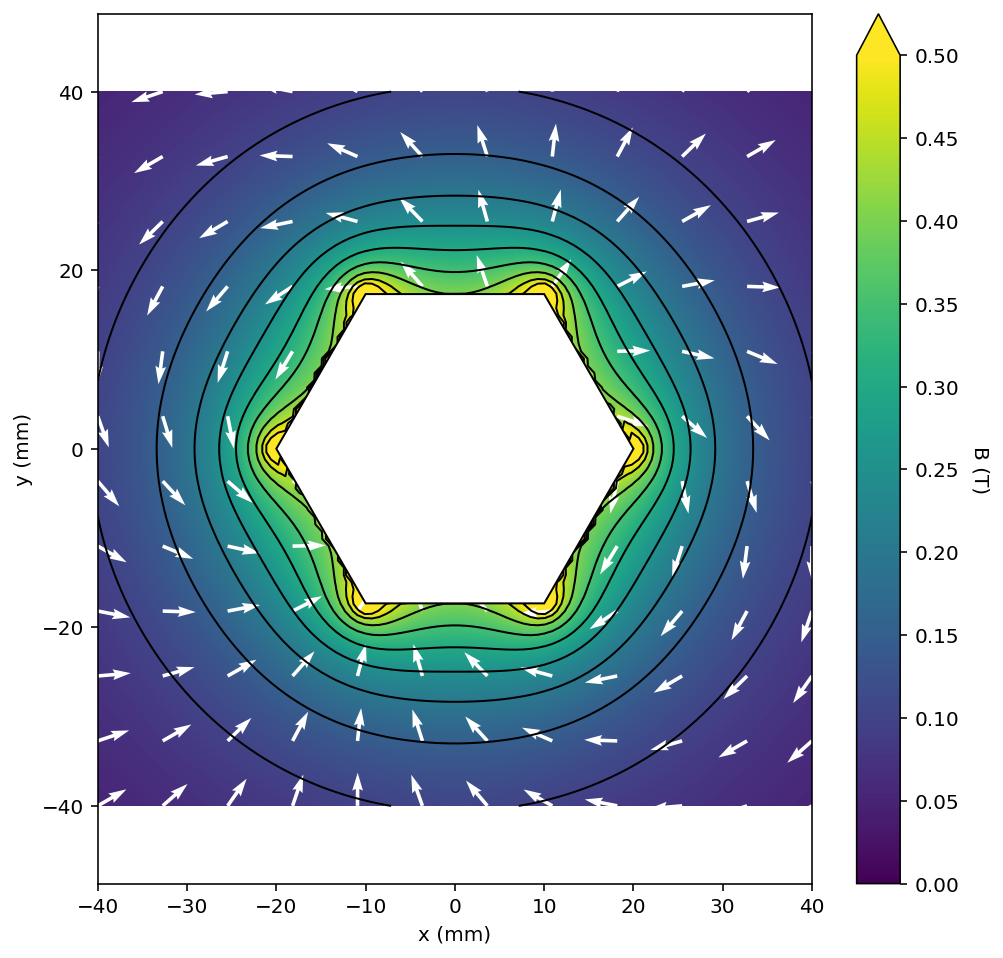

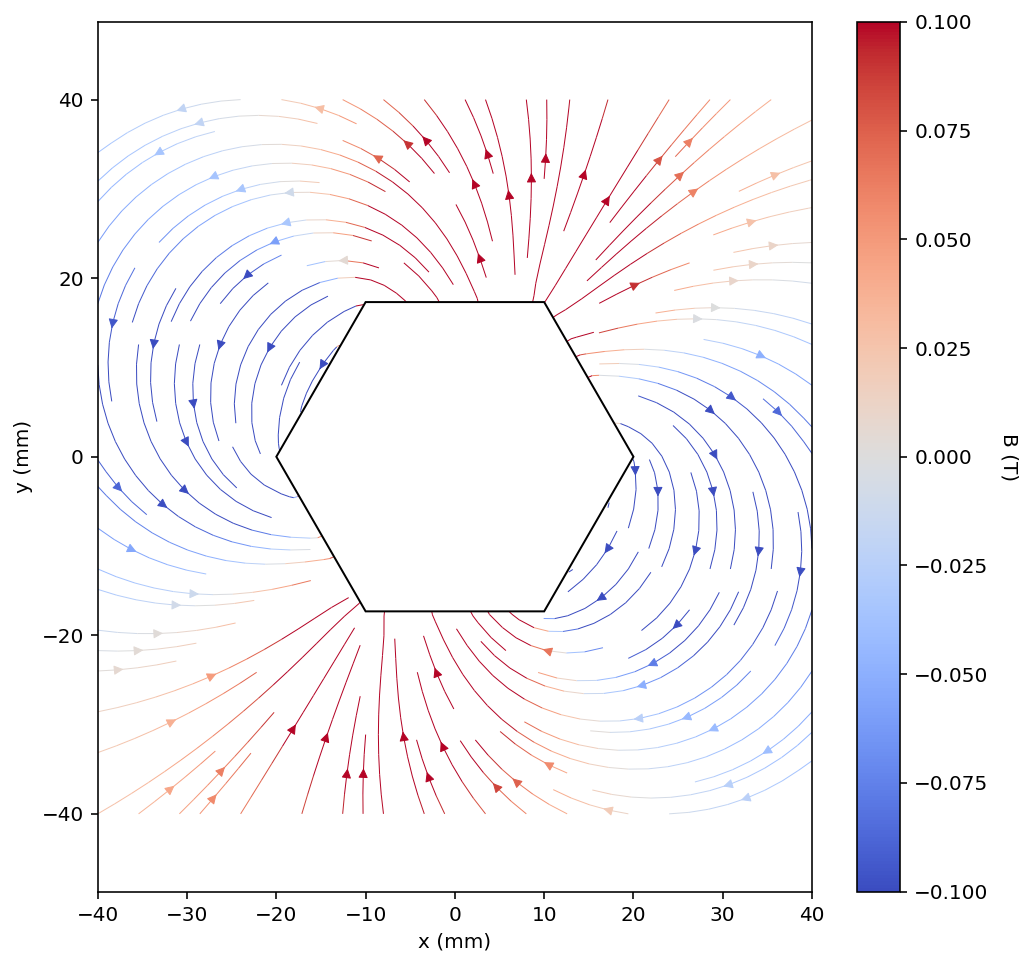

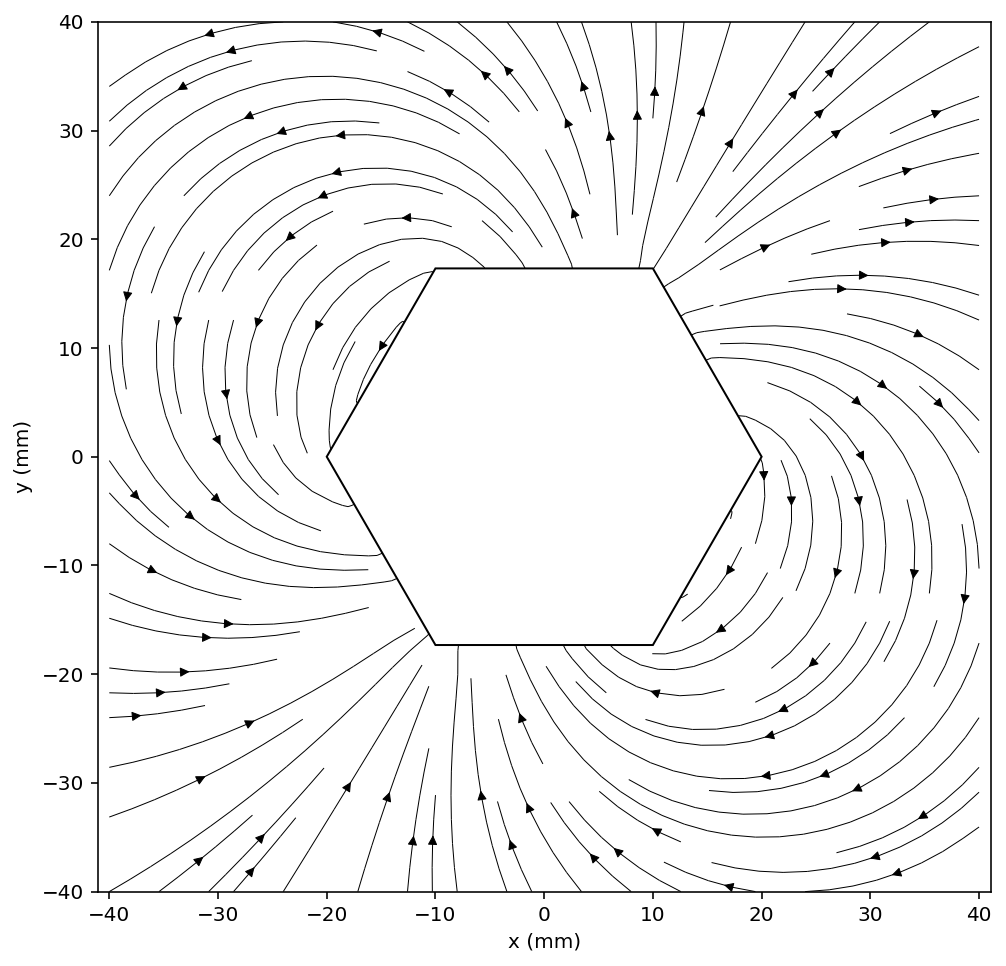

In [7]:
pm.reset() # clear magnet registry

unit = 'mm'
length = 20
num_sides = 6
center=(0, 0)

# Create the magnet
_ = pm.magnets.PolyMagnet(length=length, num_sides=num_sides, center=center, Jr=1.0, phi = 60)



# Prepare 100x100 grid of x,y coordinates to calculate the field
points = pm.grid2D(2 * length, 2 * length, unit=unit)

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_,_ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 show_magnets=True,
                                 )


_,_ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )

_,_ = pm.plots.plot_2D_contour(points, field,plot_type='streamplot')

## Custom Polygons 

#### Simple Shapes

First we need to define the vertices, this can be done directly as an array or list, or using the `Polygon` helper class as shown here

In [8]:
h = 10
wedge = pm.magnets.Polygon()
wedge.append((-h,h))
wedge.append((h,h))
wedge.append((2*h,-h))
wedge.append((-2*h,-h))

After generating the polygon, we then pass the polygon vertices to the PolyMagnet class:

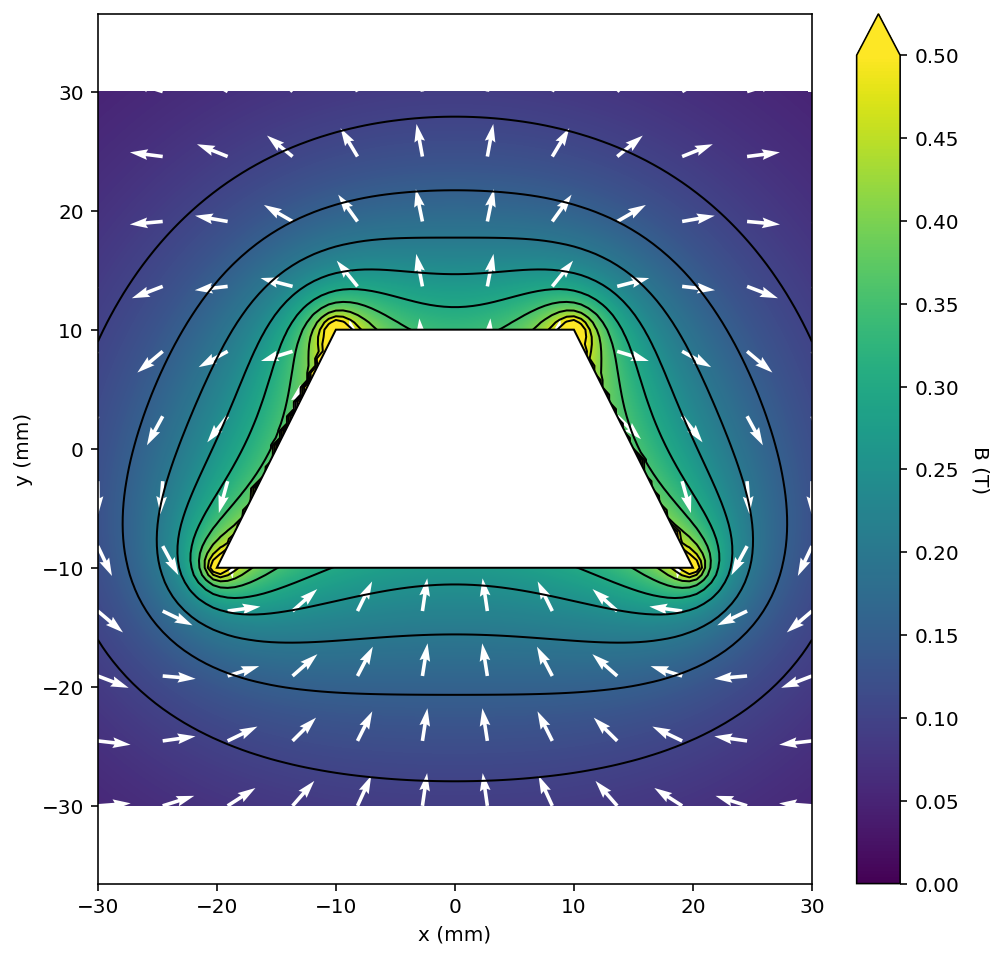

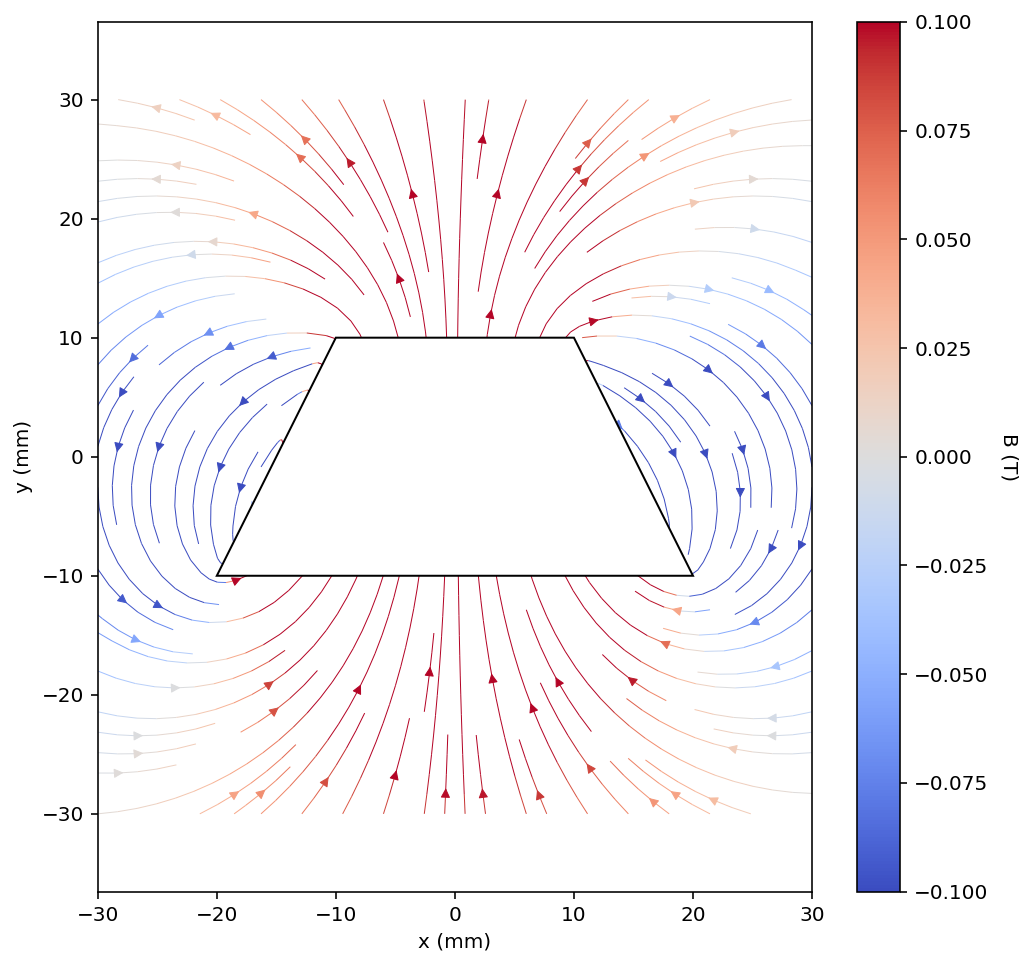

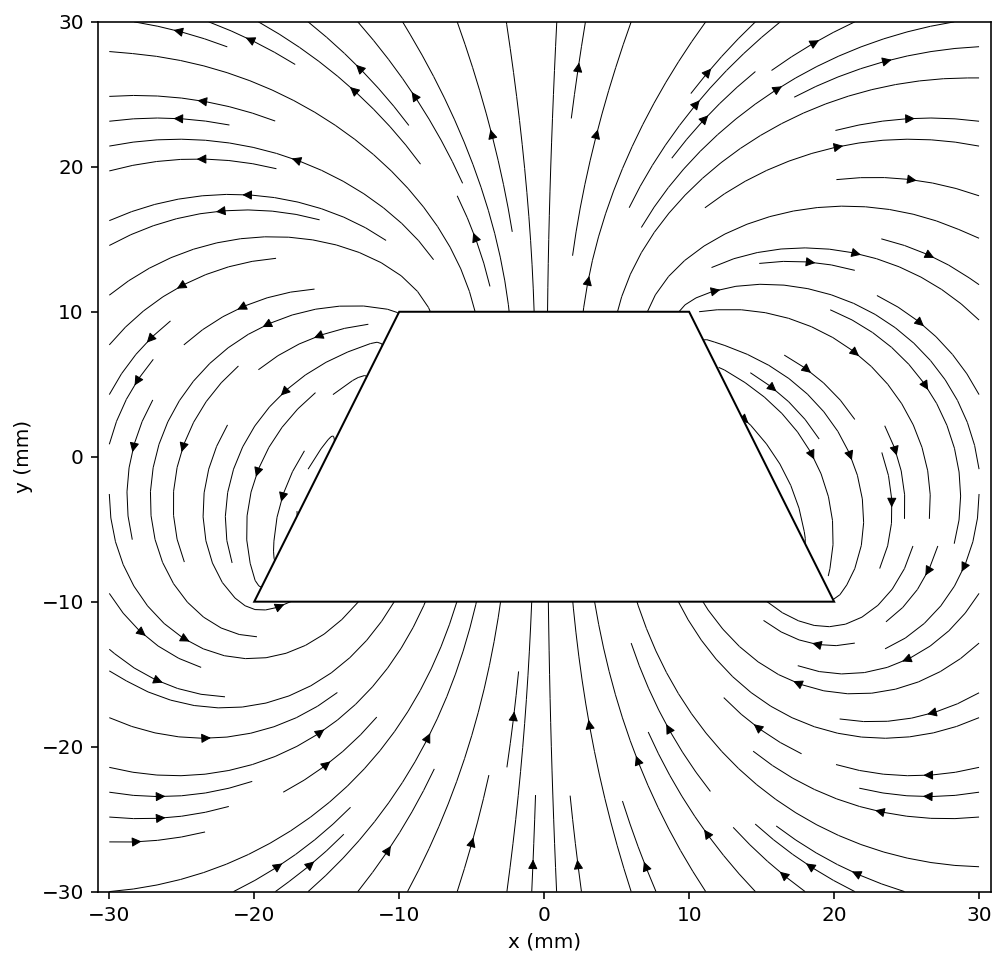

In [10]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=wedge.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 cmap=cmap, # set the colormap
                                 show_magnets=True,
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )

_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')



We can then define other polygons such as `sharp_wedge` and `vertical_pacman`:

In [11]:
sharp_wedge = pm.magnets.Polygon()
sharp_wedge.append((-h/4,h))
sharp_wedge.append((h/4,h))
sharp_wedge.append((2*h,-h))
sharp_wedge.append((-2*h,-h))

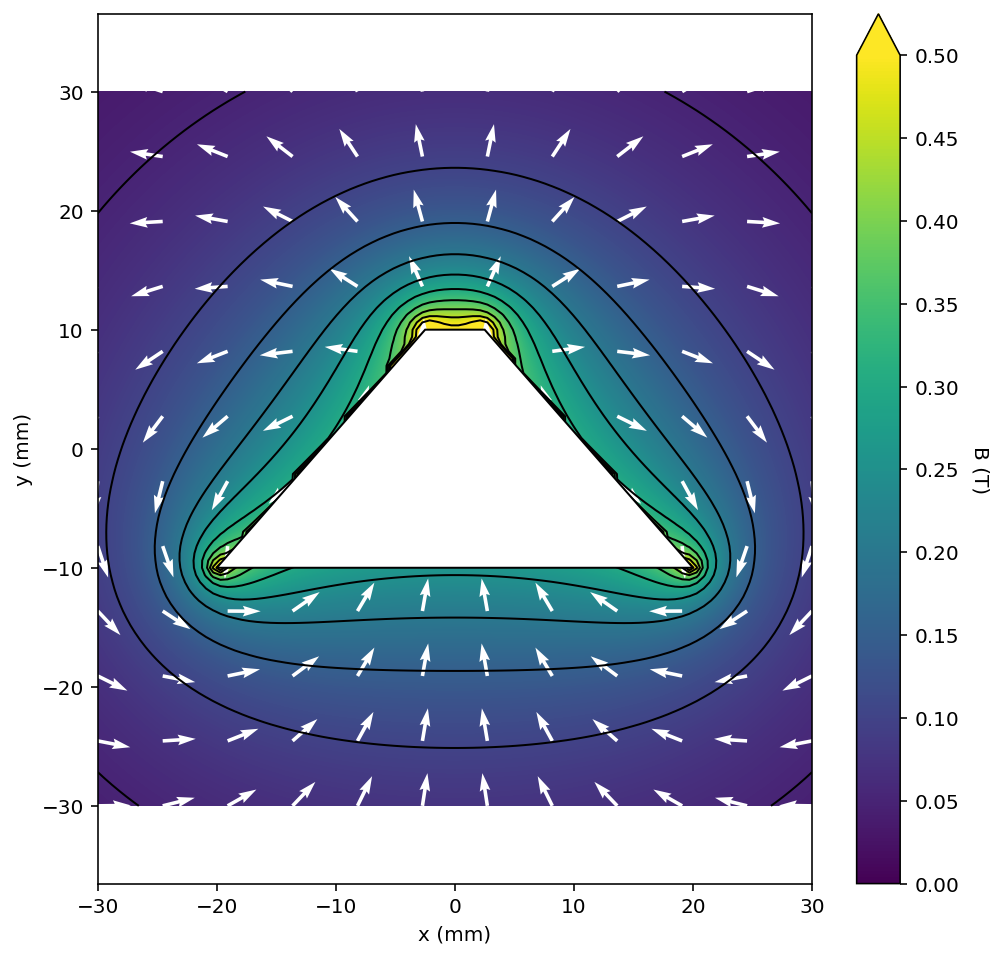

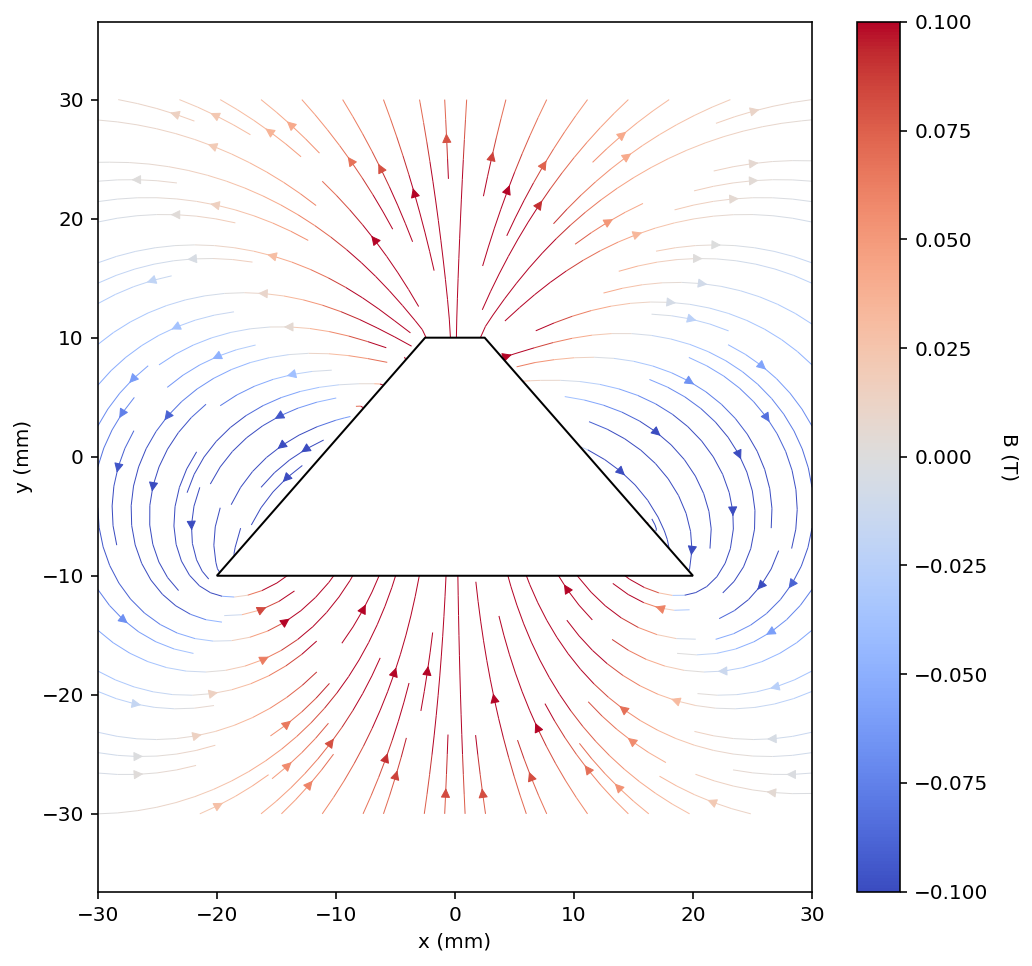

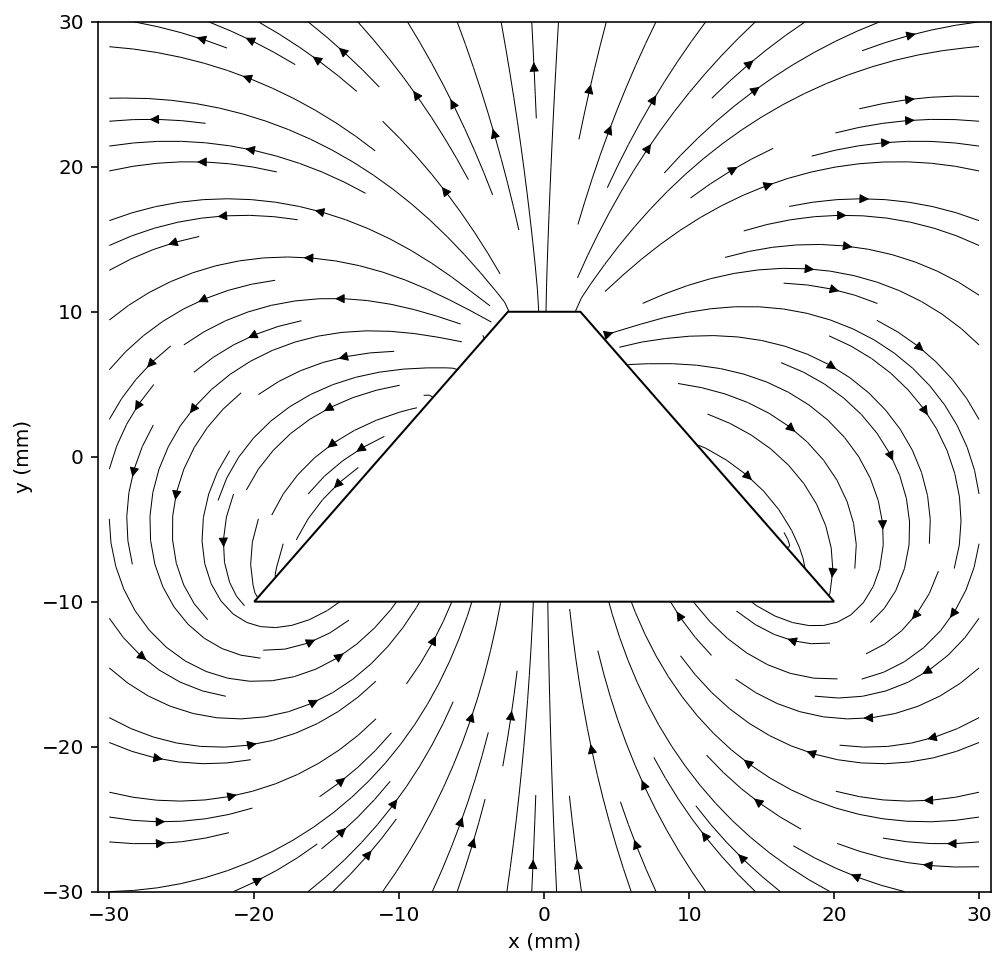

In [12]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=sharp_wedge.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 cmap=cmap, # set the colormap
                                 show_magnets=True,
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )


_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')

In [13]:
vertical_pacman = pm.magnets.Polygon()
vertical_pacman.append((-h/1,2*h))
vertical_pacman.append((0,0))
vertical_pacman.append((h/1,2*h))
vertical_pacman.append((2*h,0))
vertical_pacman.append((h/1,-2*h))
vertical_pacman.append((-h/1,-2*h))
vertical_pacman.append((-2*h,0))

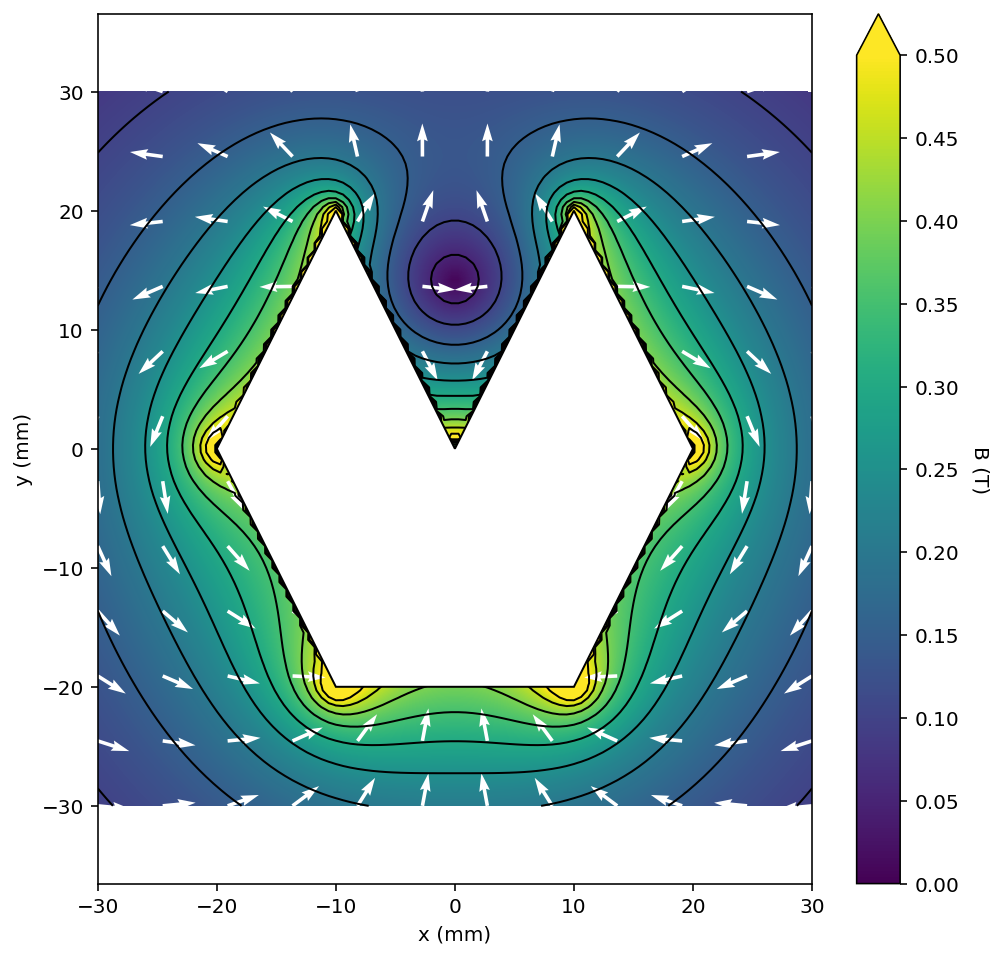

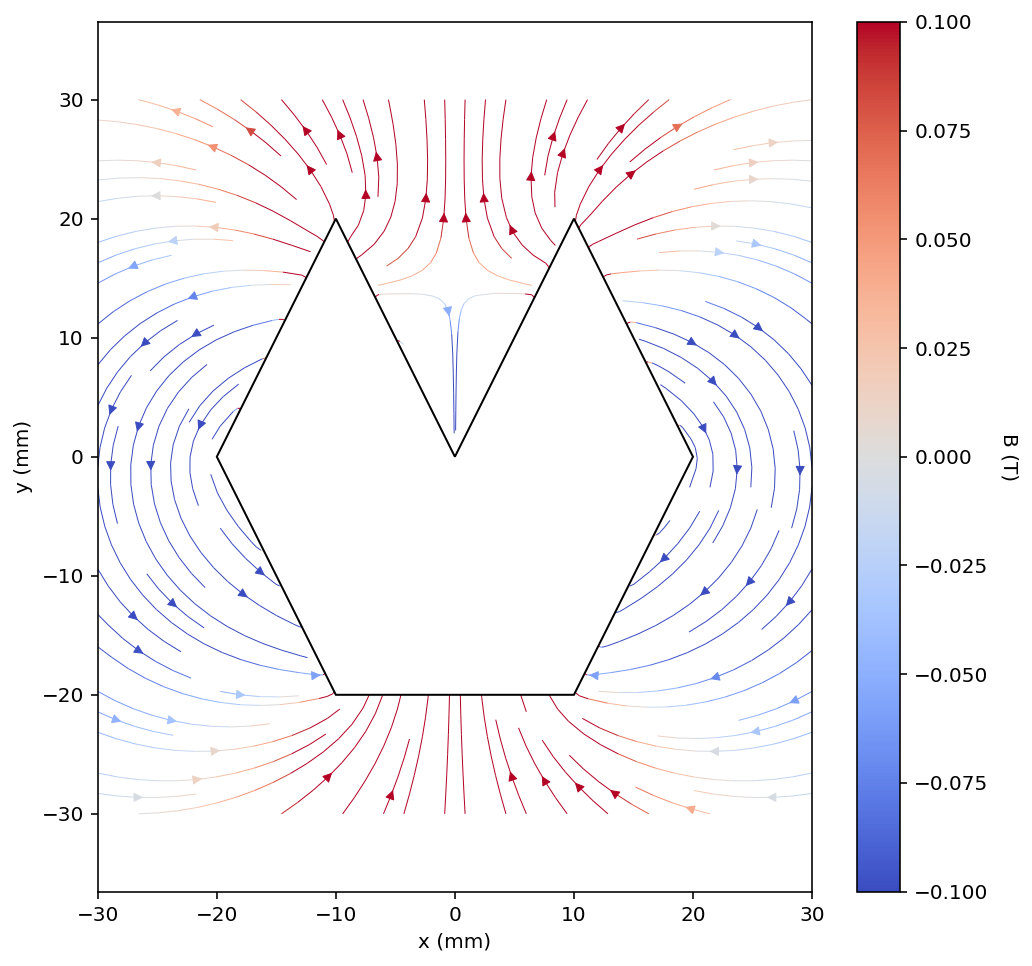

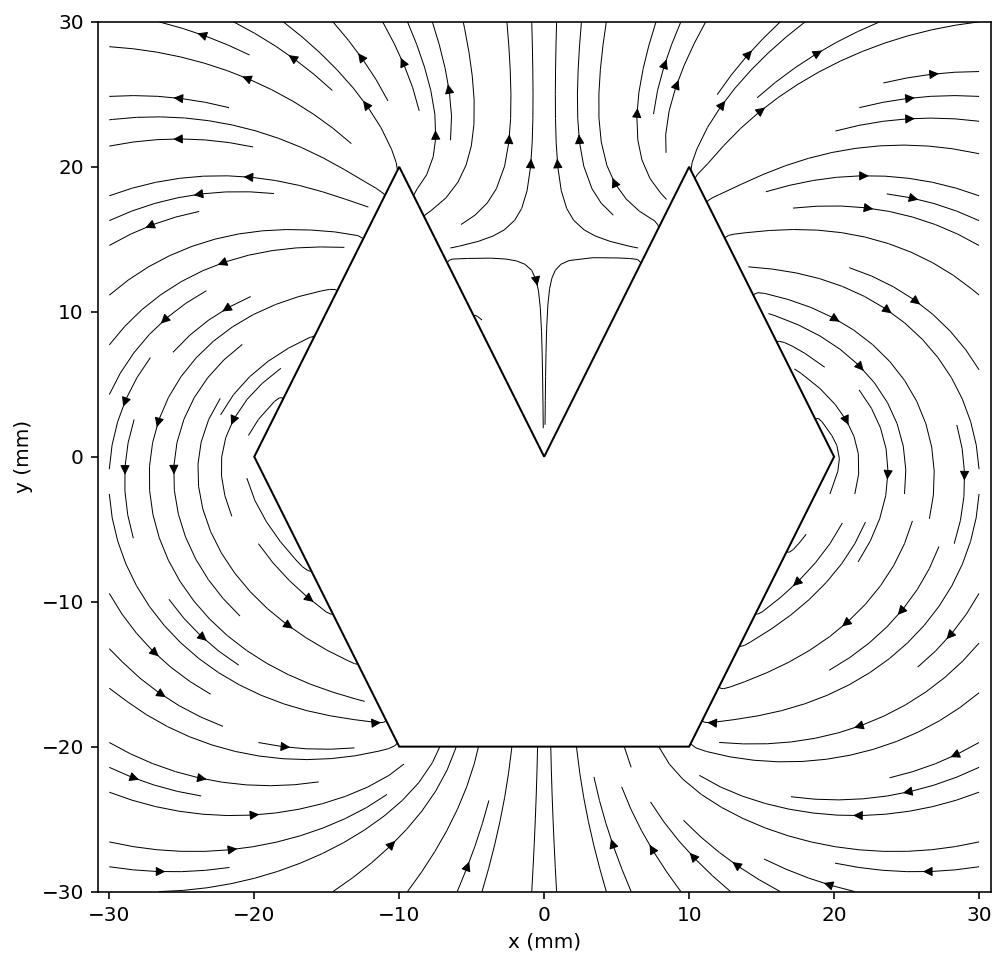

In [14]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=vertical_pacman.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')


#### Letters

Or the letters F, K, and M

In [15]:
h = 3
center = (0,0)
vertices = [(-3*h,5*h), (4*h,5*h), (4*h,3*h), (-1*h,3*h), (-1*h,1*h), (3*h,1*h),
            (3*h,-1*h), (-1*h,-1*h), (-1*h,-5*h), (-3*h,-5*h)]
magnet_f = pm.magnets.Polygon(vertices = vertices, center=center)

h = 3
center = (0,0)
vertices = [(-2*h,5*h), (0,5*h), (0,1*h), (3*h,5*h), (5*h,5*h), (2*h,0.7*h),
            (5*h,-5*h), (3*h,-5*h), (1*h,-0.4*h), (0,-1*h), (0,-5*h), (-2*h,-5*h)]
magnet_k = pm.magnets.Polygon(vertices = vertices, center=center)

h = 4
magnet_m = pm.magnets.Polygon()
magnet_m.append((-4*h,4*h))
magnet_m.append((-2*h,4*h))
magnet_m.append((0,h/2))
magnet_m.append((2*h,4*h))
magnet_m.append((4*h,4*h))
magnet_m.append((4*h,-4*h))
magnet_m.append((2*h,-4*h))
magnet_m.append((2*h,1*h))
magnet_m.append((0,-2*h))
magnet_m.append((-2*h,1*h))
magnet_m.append((-2*h,-4*h))
magnet_m.append((-4*h,-4*h))

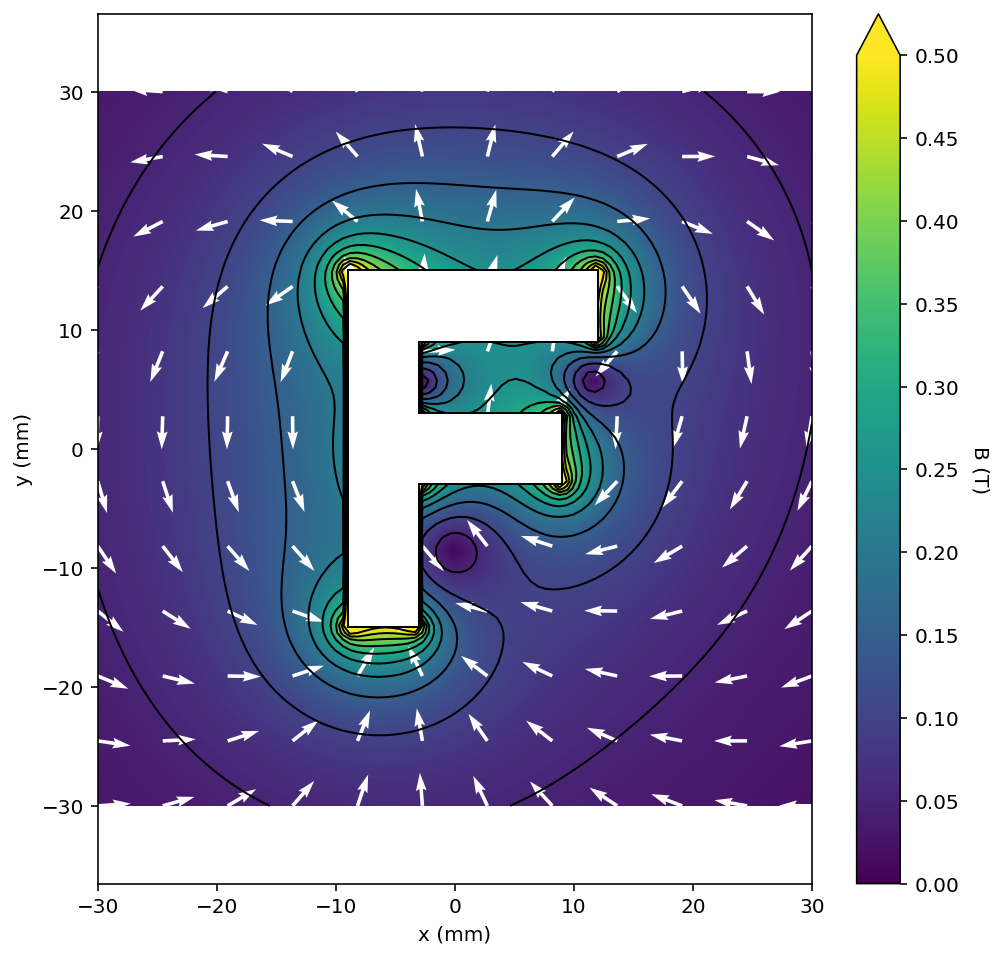

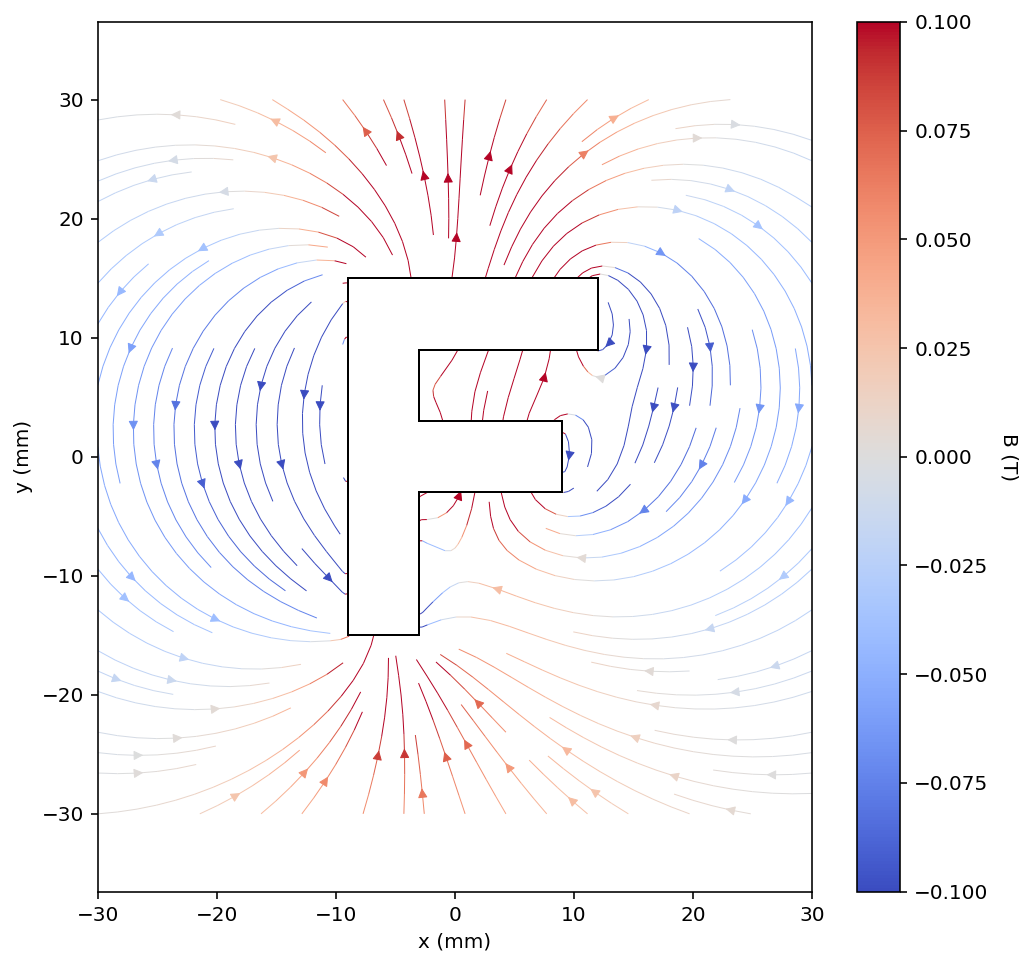

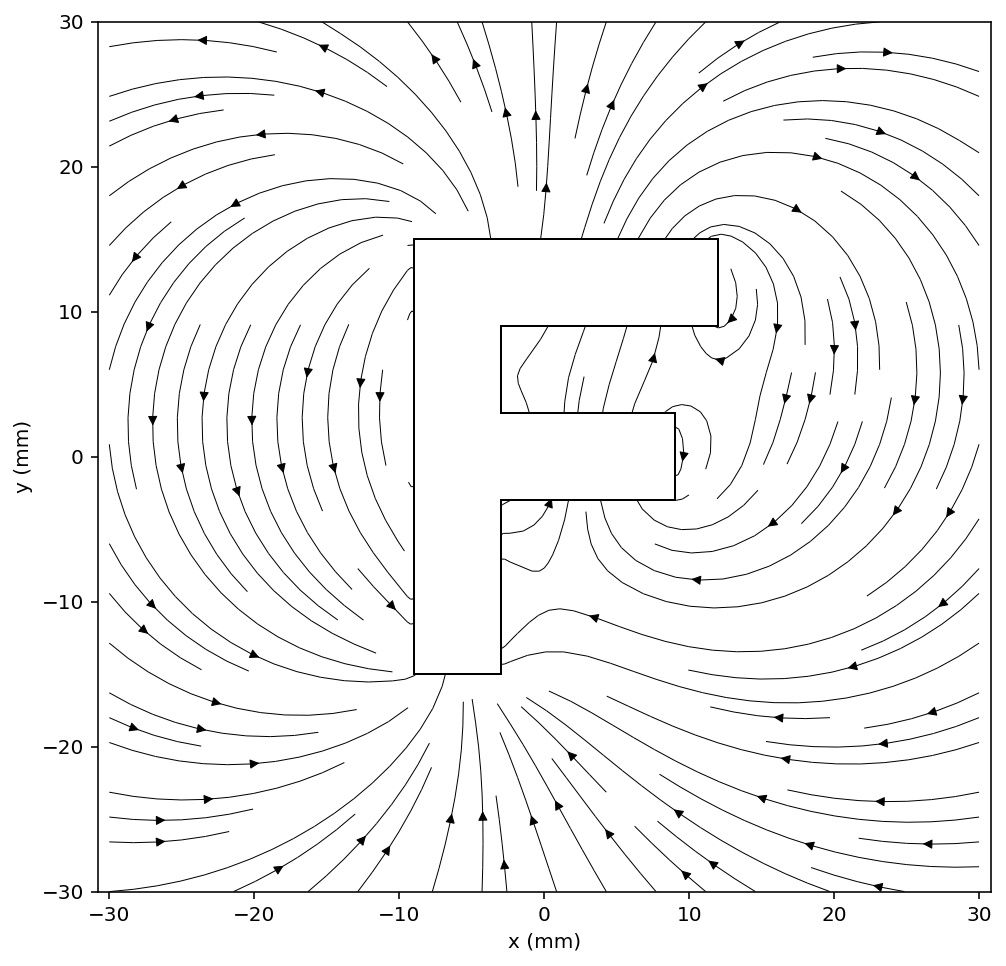

In [16]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=magnet_f.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')


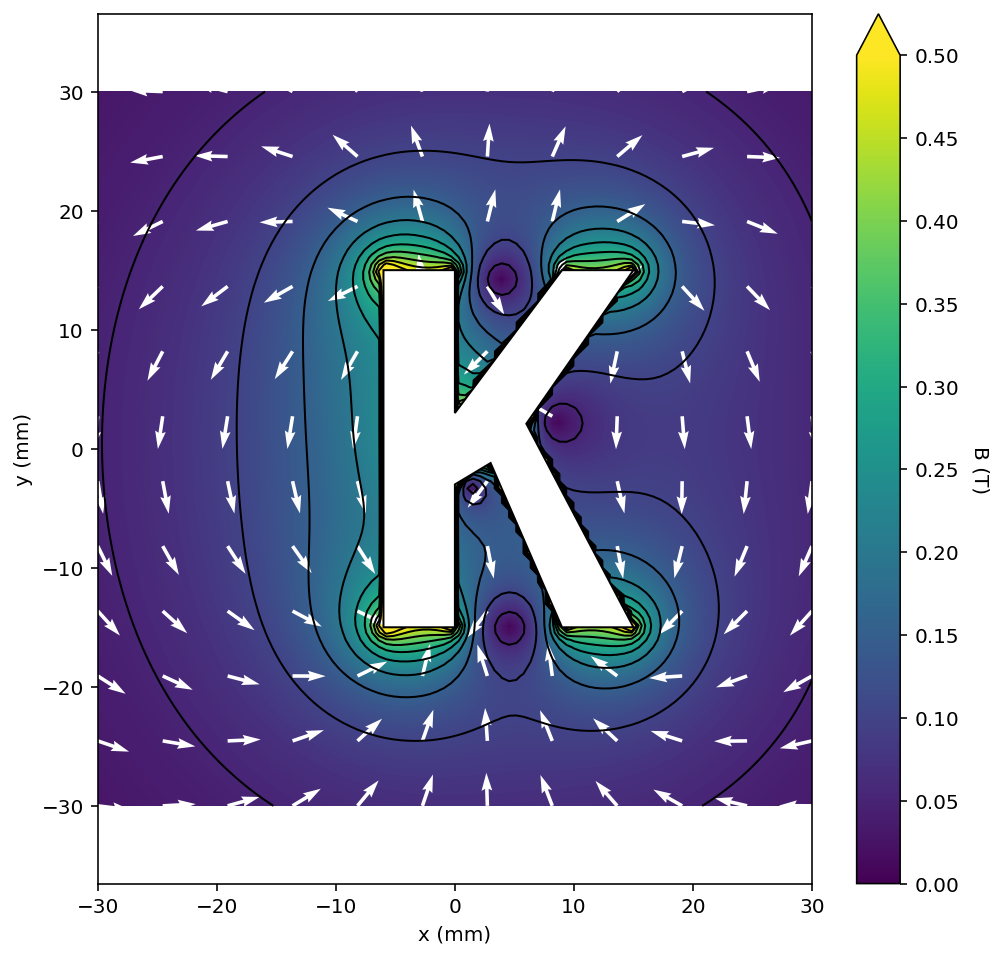

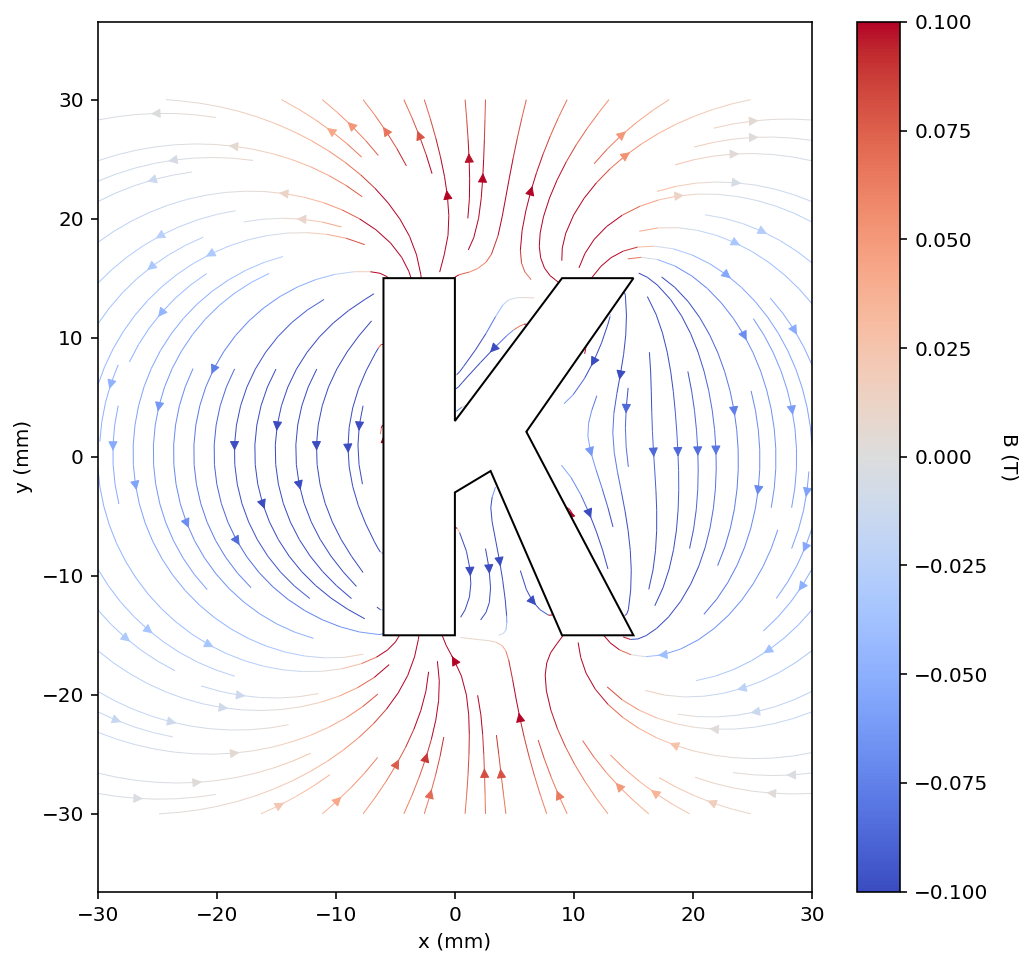

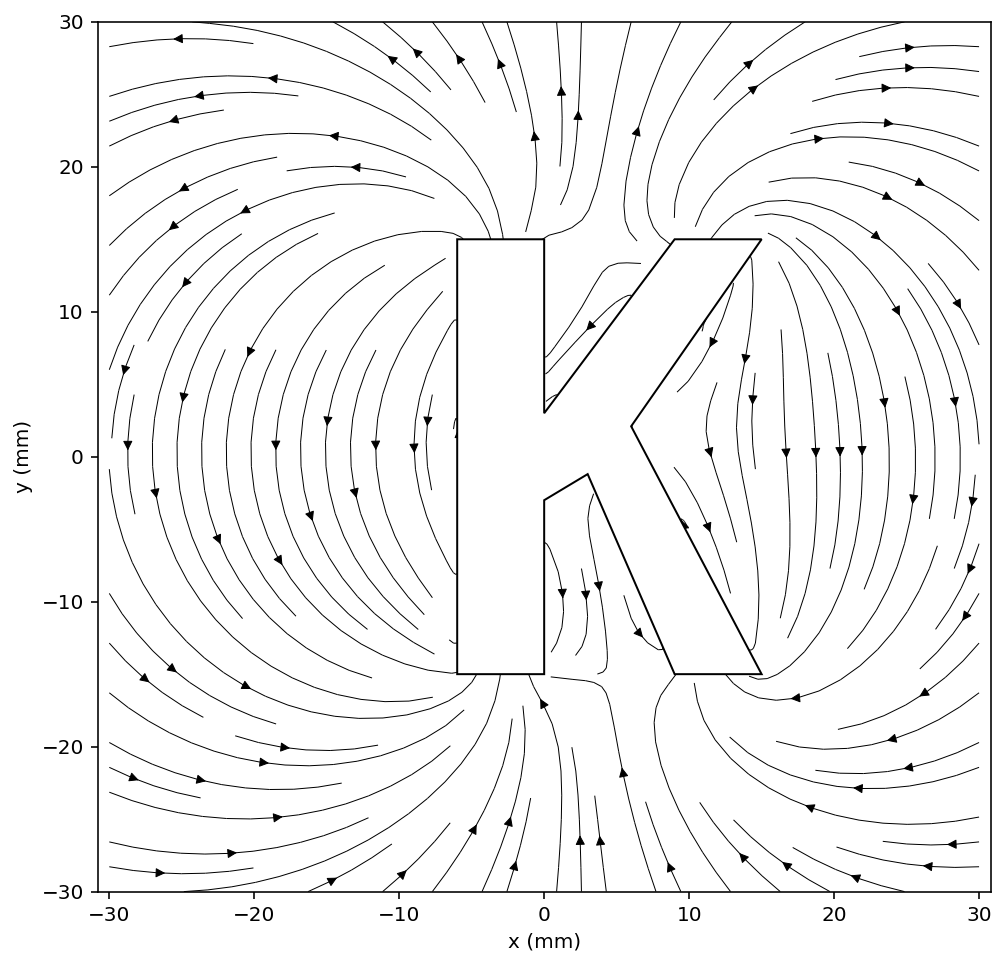

In [17]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=magnet_k.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')


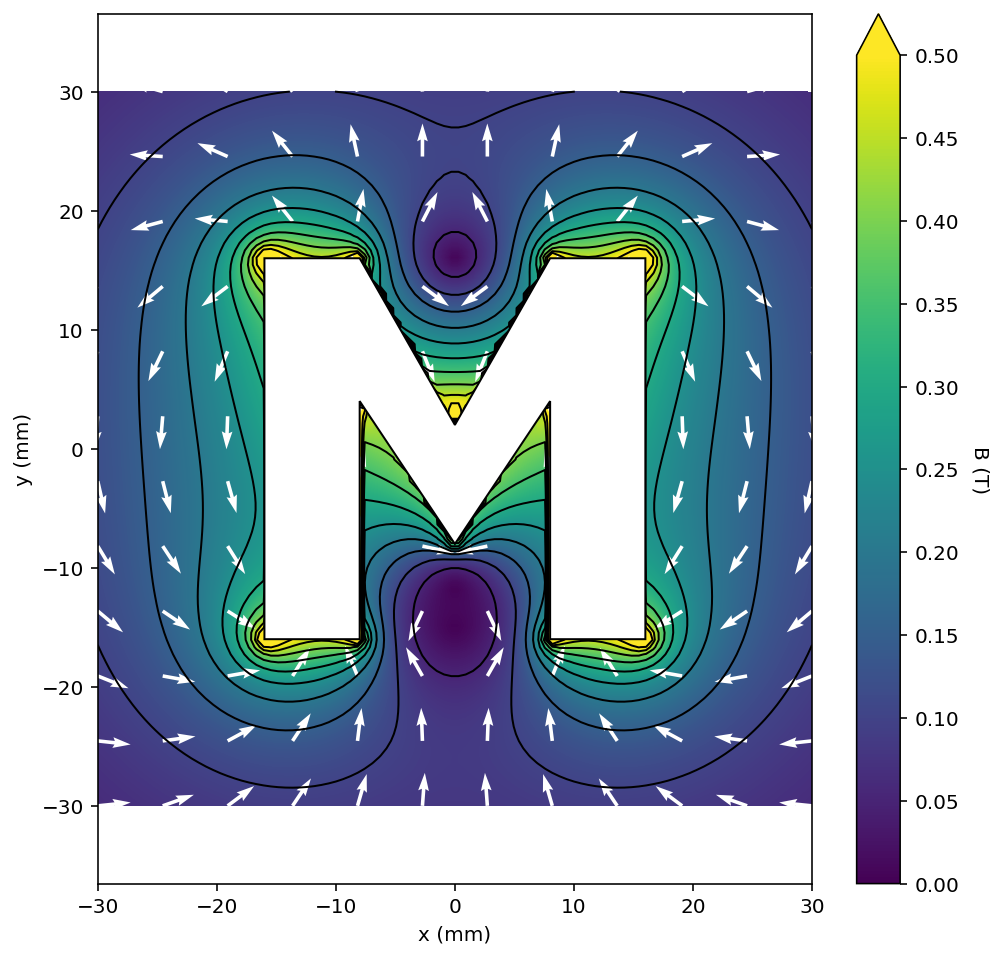

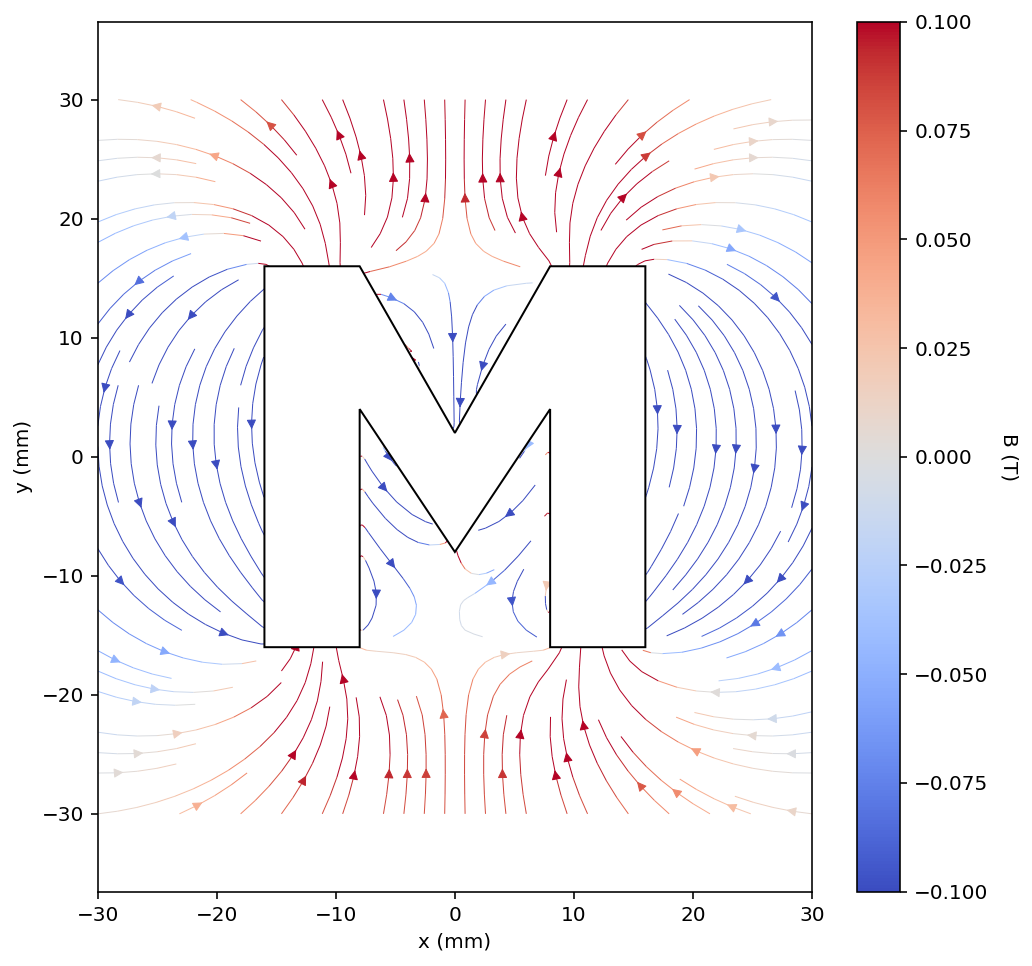

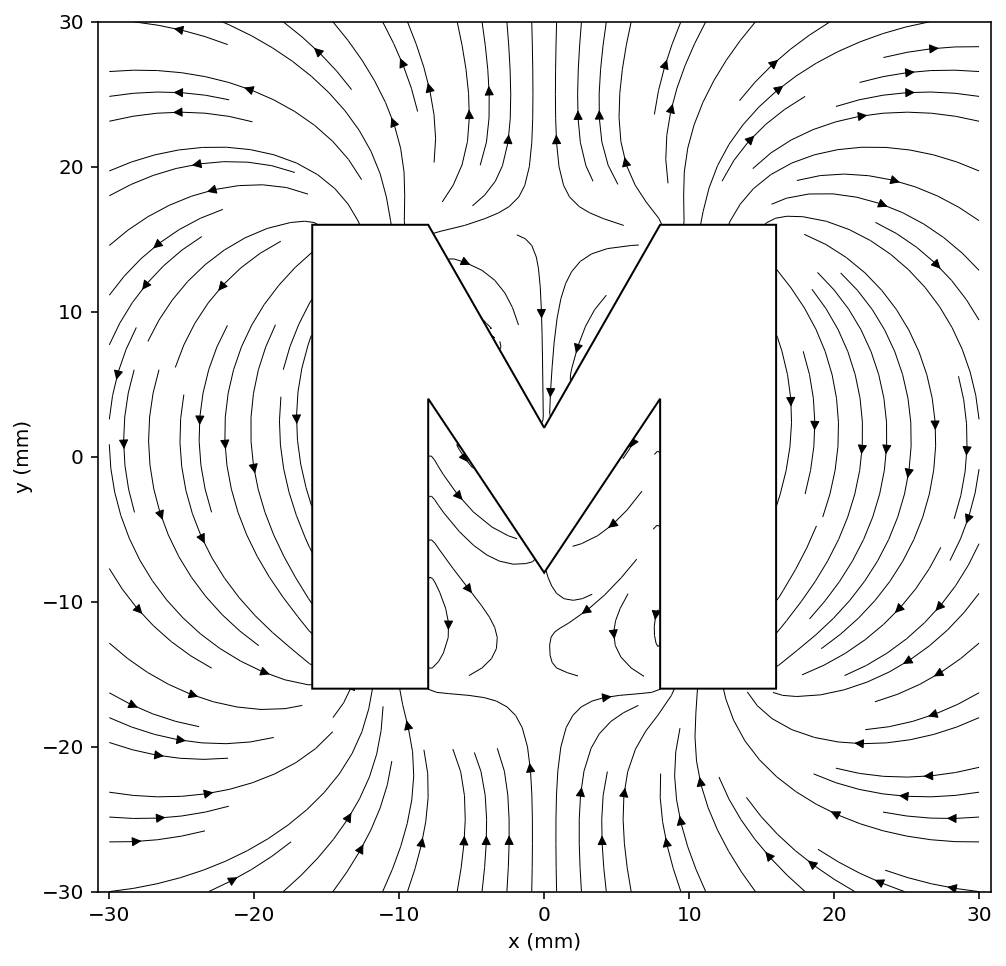

In [18]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=magnet_m.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 90,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')


Not forgetting that the orientation of the magnetisation can be rotated:

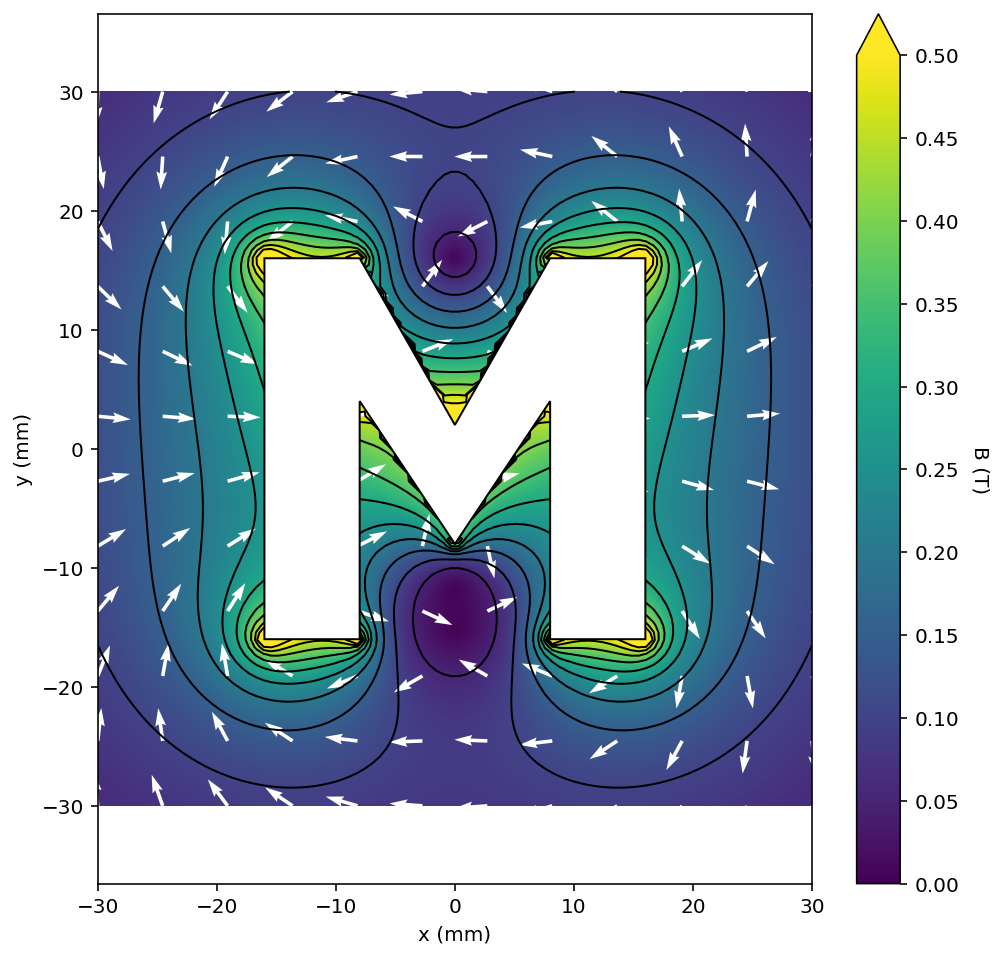

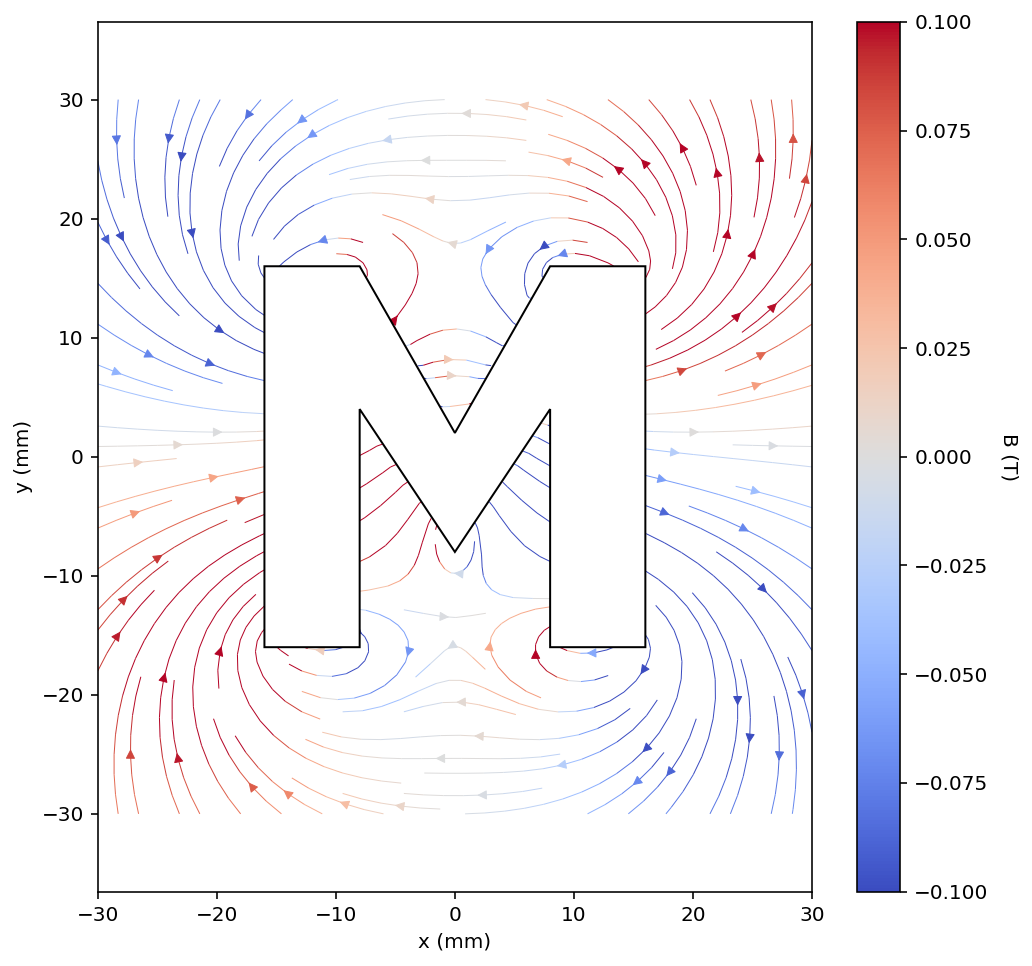

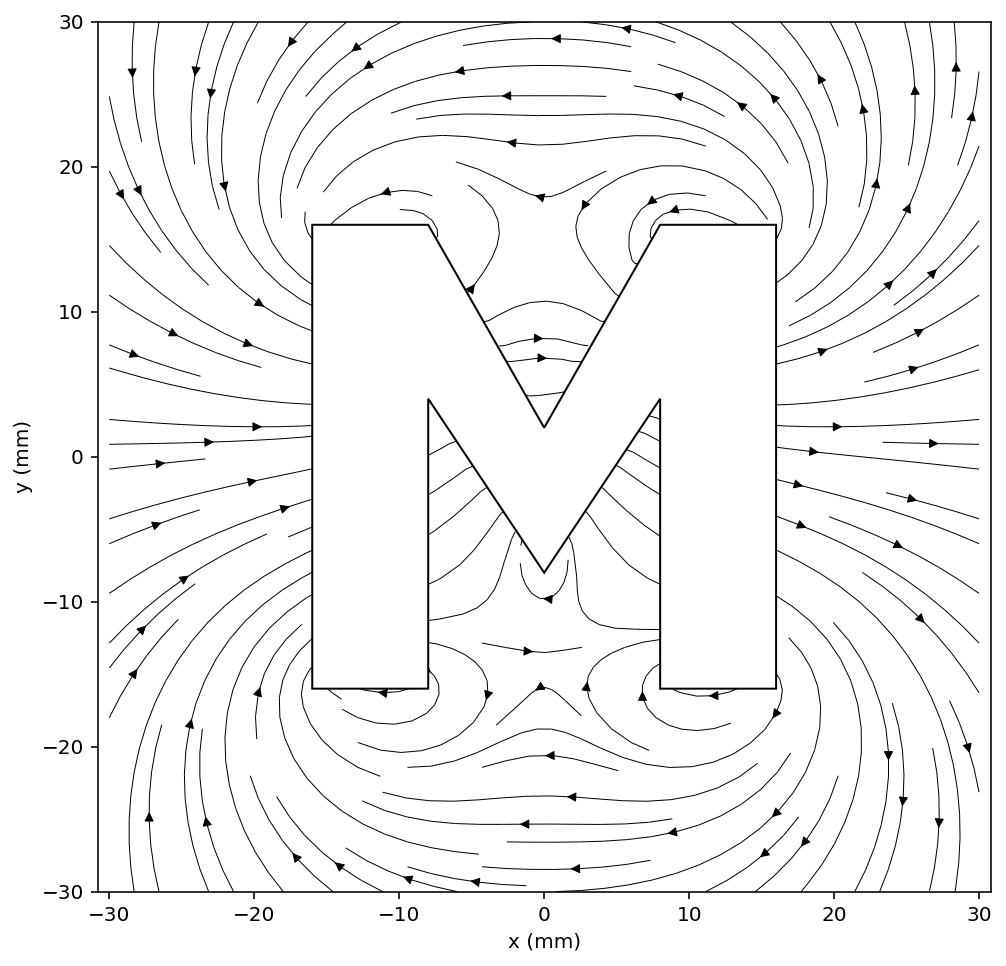

In [19]:
pm.reset() # clear magnet registry

cmap = 'viridis' # set the colormap

center=(0, 0)
theta = 0

# Create the magnet


_ = pm.magnets.PolyMagnet(custom_polygon=True,
                          vertices=magnet_m.vertices,
                          Jr=1.0, # Remnant magnetisation in T,
                          phi = 0,
                          theta=theta,
                          center=center
                         )

points = pm.grid2D(30, 30, unit='mm')

# Calculate the magnetic field due to all magnets in the registry
field = pm.get_field_2D(points)


_, _ = pm.plots.plot_2D_contour(points, field, cmin=0.0, # minimum field value
                                 cmax=0.5, # maximum field value
                                 num_arrows=11, # plot the vector field
                                 )


_, _ = pm.plots.plot_2D_contour(points, field, cmin=-0.1, # minimum field value
                                 cmax=0.1, # maximum field value
                                 cmap='coolwarm', # set the colormap
                                 plot_type='streamplot',
                                 show_magnets=True,
                        )
_, _ = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')
